In [1]:
"""Auction mechanism analysis"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [33]:
paper = [
    "paper_fog_v2_j4_s1_0",
    "paper_fog_v2_j8_s2_1",
    "paper_fog_v2_j12_s3_0",
    "paper_fog_v2_j12_s3_1",
    "paper_fog_v2_j4_s1_1",
    "paper_fog_v2_j8_s2_2",
    "paper_fog_v2_j12_s3_2",
    "paper_fog_v2_j16_s4_0",
    "greedy_fog_v2_j4_s1_0",
    "greedy_fog_v2_j8_s2_0",
    "greedy_fog_v2_j12_s3_0"
]

encoded_filenames = paper
folder = 'paper'

In [34]:
data = []
model_names: List[str] = []
test_name: str = ''

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        json_data = json.load(file)
        
        for pos, results in enumerate(json_data):
            # Find the best results of sum value or percentage jobs from all of the algorithms
            best_sum_value = results['optimal']['sum value'] if 'optimal' in results else max(r['sum value'] for r in results.values())
            best_percentage_jobs = results['optimal']['percentage jobs'] if 'optimal' in results else max(r['percentage jobs'] for r in results.values())
            if best_percentage_jobs == 0:
                continue
                
            for algo_name, algo_results in results.items():
                if type(algo_results) is dict:  # Otherwise optimal or relaxed == 'failure'
                    data.append((pos, model_name, algo_name, algo_results['sum value'],
                                 algo_results['percentage jobs'], algo_results['solve_time'],
                                 algo_results['sum value'] / best_sum_value,
                                 algo_results['percentage jobs'] / best_percentage_jobs))
                    

df = pd.DataFrame(data, columns=['Pos', 'Model Name', 'Algorithm Name', 'Social Welfare', 'Percentage Jobs',
                                 'Solve Time', 'Optimal Social Welfare', 'Best Percentage Jobs'])

In [35]:
df['Algorithm Name'].unique()

array(['optimal', 'relaxed', 'fixed', 'dia 1', 'dia 2', 'dia 3', 'dia 5',
       'dia 10', 'Greedy Utility / Sum, minimise Sum, Percentage Sum',
       'Greedy Utility / Sum, minimise Sum, Sum of speeds',
       'Greedy Utility / Sum, maximise Sum, Percentage Sum',
       'Greedy Utility / Sum, maximise Sum, Sum of speeds',
       'Greedy Utility / Sum, minimise Job Sum of Percentage Sum, Percentage Sum',
       'Greedy Utility / Sum, minimise Job Sum of Percentage Sum, Sum of speeds',
       'Greedy Utility / Sum, maximise Job Sum of Percentage Sum, Percentage Sum',
       'Greedy Utility / Sum, maximise Job Sum of Percentage Sum, Sum of speeds',
       'Greedy Utility / Sum, minimise Job Sum of Sum of speeds, Percentage Sum',
       'Greedy Utility / Sum, minimise Job Sum of Sum of speeds, Sum of speeds',
       'Greedy Utility / Sum, maximise Job Sum of Sum of speeds, Percentage Sum',
       'Greedy Utility / Sum, maximise Job Sum of Sum of speeds, Sum of speeds',
       'Greedy Uti

Save file location: ../figures/price_change/png/all_shortened.png


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: ../figures/price_change/eps/all_shortened.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


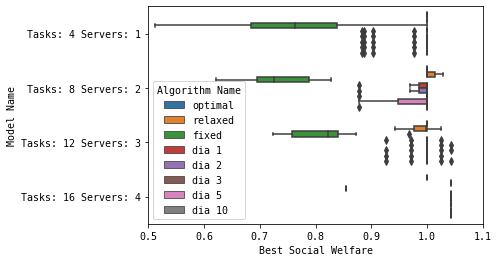

In [14]:
g = sns.boxplot(y='Model Name', x='Optimal Social Welfare', hue='Algorithm Name', data=df)
g.set_xlim(0.5, 1.1)
save_plot(analysis_filename('all', 'shortened'), "price_change", image_formats=[ImageFormat.PNG, ImageFormat.EPS])

Save file location: ../figures/price_change/png/all_shortened.png
Save file location: ../figures/price_change/eps/all_shortened.eps


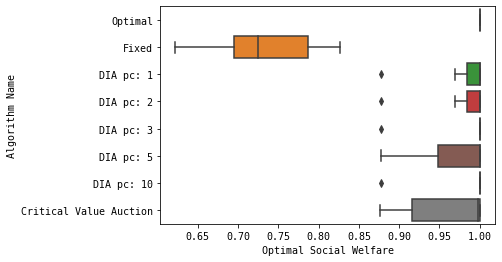

In [36]:
df_2 = df[(df['Model Name'] == 'Tasks: 8 Servers: 2') & ((df['Algorithm Name'] == 'optimal') | 
                                                         (df['Algorithm Name'] == 'fixed') |
                                                         (df['Algorithm Name'] == 'Greedy Utility * deadline / Sum, minimise Sum, Percentage Sum') |
                                                         (df['Algorithm Name'] == 'dia 1') |
                                                         (df['Algorithm Name'] == 'dia 2') |
                                                         (df['Algorithm Name'] == 'dia 3') |
                                                         (df['Algorithm Name'] == 'dia 5') |
                                                         (df['Algorithm Name'] == 'dia 10'))]

df_2 = df_2.replace('optimal', 'Optimal').replace('relaxed', 'Relaxed').replace('fixed', 'Fixed').replace('dia 1', 'DIA pc: 1').replace('dia 2', 'DIA pc: 2').replace('dia 3', 'DIA pc: 3').replace('dia 5', 'DIA pc: 5').replace('dia 10', 'DIA pc: 10').replace('Greedy Utility * deadline / Sum, minimise Sum, Percentage Sum', 'Critical Value Auction')


g = sns.boxplot('Optimal Social Welfare', 'Algorithm Name', data=df_2)
save_plot(analysis_filename('all', 'shortened'), "price_change", image_formats=[ImageFormat.PNG, ImageFormat.EPS])